# Problem 1

### 1.1
 You will have to show calculations for each layer and then sum it to obtain the total number of parameters in Alexnet. When calculating you will need to account for all the filters (size, strides, padding) at each layer.

In [ ]:
conv1_params = (11 * 11 * 3) * 96 + 96
conv2_params = (5 * 5 * 96) * 256 + 256
conv3_params = (3 * 3 * 256) * 384 + 384
conv4_params = (3 * 3 * 384) * 384 + 384
conv5_params = (3 * 3 * 384) * 256 + 256
fc1_params = (6 * 6 * 256) * 4096 + 4096
fc2_params = 4096 * 4096 + 4096
fc3_params = 4096 * 1000 + 1000

# Summing up all the parameters
total_params = (
    conv1_params + conv2_params + conv3_params +
    conv4_params + conv5_params + fc1_params + fc2_params + fc3_params
)

total_params

62378344

### 1.2
For this question, you need to complete Table 1 below for calculating activation units and parameters at each layer in VGG19 (without counting biases). It has been partially filled for you. (6)

| Layer     | Number of Activations (Memory) | Parameters (Compute)   |
|-----------|--------------------------------|------------------------|
| **Input** | 224x224x3=150K                 | 0                      |
| **CONV3-64** | 224x224x64=3.2M               | (3x3x3)x64 = 1,728      |
| **CONV3-64** | 224x224x64=3.2M               | (3x3x64)x64 = 36,864    |
| **POOL2**  | 112x112x64=800K                | 0                      |
| **CONV3-128** | 112x112x128=1.6M             | (3x3x64)x128 = 73,728 |
| **CONV3-128** | 112x112x128=1.6M             | (3x3x128)x128 = 147,456|
| **POOL2**  | 56x56x128=400K                 | 0                      |
| **CONV3-256** | 56x56x256=800K               | (3x3x128)x256= 294,912 |
| **CONV3-256** | 56x56x256=800K               | (3x3x256)x256 = 589,824 |
| **CONV3-256** | 56x56x256=800K               | (3x3x256)x256 = 589,824 |
| **CONV3-256** | 56x56x256=800K               | (3x3x256)x256 = 589,824 |
| **POOL2**  | 28x28x256=200K                 | 0                      |
| **CONV3-512** | 28x28x512=400K               | (3x3x256)x512 = 1,179,648 |
| **CONV3-512** | 28x28x512=400K               | (3×3×512)×512=2,359,296  |
| **CONV3-512** | 28x28x512=400K               | (3×3×512)×512=2,359,296|
| **CONV3-512** | 28x28x512=400K               | (3×3×512)×512=2,359,296 |
| **POOL2**  | 14x14x512=100K                 | 0                      |
| **CONV3-512** | 14x14x512=100K               | (3x3x512)x512 = 2,359,296 |
| **CONV3-512** | 14x14x512=100K               | (3x3x512)x512 = 2,359,296 |
| **CONV3-512** | 14x14x512=100K               | (3x3x512)x512 = 2,359,296 |
| **CONV3-512** | 14x14x512=100K               | (3x3x512)x512 = 2,359,296 |
| **POOL2**  | 7x7x512=25K                    | 0                      |
| **FC**     | 4096                           | 7x7x512x4096 = =102,760,448  |
| **FC**     | 4096                           | 4096x4096 = 16,777,216   |
| **FC**     | 1000                           | 4096x1000 = 4,096,000              |
| **TOTAL**  | **16M**                               | **143,652,544**          |


### 1.3

VGG architectures have smaller filters but deeper networks compared to Alexnet (3x3 compared to 11x11 or 5x5). Show that a stack of N convolution layers each of filter size F × F has the same receptive field as one convolution layer with filter of size (NF − N + 1) × (NF − N + 1). Use this to calculate the receptive field of 3 filters of size 5x5. (4)


We know that a stack of $N$ convolution layers, each with a filter size
$F×F$. For a convolutional layer with filter size $F \times F$ and stride 1, the receptive field increases by $F - 1$ pixels in both width and height with each layer due to the overlapping regions.
1. For a single layer  $R_1 = F$.
2. For two layers stacked together, $R_2 = R_1 + (F - 1) = F + (F - 1) = 2F - 1$
3. For $N$ layers: $R_3 = R_2 + (F - 1) = (2F - 1) + (F - 1) = 3F - 2$

By following this pattern, we can generalize the receptive field size after $N$ layers as:
   $
   R_N = NF - (N - 1)
   $
Thus the cumulative receptive field size of $N$ stacked $F \times F$ filters is equivalent to a single, large filter with dimensions:
   $
   (N F - N + 1) \times (NF - N + 1)
   $
Same to all these layers.

* $N = 3$ and $F = 5$
* use the formular: $(3*5-3*1)x(3*5-3+1) = 13x13$

### 1.4

(a):
The Inception Module is designed to allow a CNN to benefit from multi-level feature extraction by implementing filters of various sizes in the same layer of the network. It can capture features at multiple scales by using parallel convolutional filters of different sizes and pooling, allowing the network to efficiently learn both fine and coarse details from the input and effectively  choose the most relevant scale for each specific spatial location in the input.


(b):Assume applying with paddings
1.  for native version,
* Cov1: 31x31x128,
* Cov2:32x32x192,
* Cov3: 32x32x96
* MaxPooling: 32x32x256.
* Thus the total channel is 128+192+96+256=672 and final output is 32×32×672.

2.  for diemnsion reduction version,  
* Cov1: 31x31x128,
* Cov2: 31x31x128, Followed by 3x3 output size: 32×32×192,
* Cov3:32x32x32, Followed by 5x5 output size: 32×32×96,  
* MaxPooling follow by 1x1: 32x32x64.
* Thus the total channel is 128+192+96+64=480 and final output is 32×32×480.


(c):
1. for native version,
* 1x1: 32×32×128×1×1×256
* 3x3:32×32×192×3×3×256
* 5x5: 32×32×96×5×5×256
* Total Operations (Naive):sum(1x1,3x3,5x5) = 1115684864

2. for diemnsion reduction version,
* 1x1: 32×32×128×1×1×256=33,554,432,
* 1x1 followed by 3x3:32×32×128×1×1×256=33,554,432 and 32×32×192×3×3×128=226,492,416
* 1x1 followed by 5x5:32×32×32×1×1×256=8,388,608 and
32×32×96×5×5×32=78,643,200
* Max pooling followed by 1x1:
32×32×64×1×1×256=16,777,216
* Total Operations (Dimension Reduction):
33,554,432+33,554,432+226,492,416+8,388,608+78,643,200+16,777,216=397410304

(d). Comparing both, I think the diemnsion reduction version is better to save the computational complexity. The problem of Native architecture is large kernel size and high channel depth which multiply the computational load significantly. The dimensionality reduction version addresses these issues by inserting 1x1 convolutions before the larger 3x3 and 5x5 convolutions. These 1x1 convolutions act as bottleneck layers that reduce the depth of the feature maps before the more computationally expensive operations. Thus, using dimensionality reduction results in significant computational savings of approximately 62.38%, making the Inception module much more efficient without a significant compromise in its ability to learn complex features.

### 1.5
Faster R-CNN is a CNN-based architecture for object detection which is much faster than Fast R-CNN. Read the Faster R-CNN paper referenced below and answer the following questions:

(a). The main difference is that instead of using selective search with Fast R-CNN, Faster R-CNN introduces a Region Proposal Network (RPN) that shares full-image convolutional features with the detection network, enabling nearly cost-free region proposals. This unified model optimizes both accuracy and speed by enabling the convolutional network to learn region proposals directly from the images, enhancing both the efficiency and scalability of the model.

(b).A Region Proposal Network (RPN) processes an image of any size to generate a set of rectangular object proposals, each rated with an objectness score to indicate the likelihood of containing an object. This network applies a sliding window over the convolutional feature map, using predefined anchor boxes of various scales and aspect ratios to propose regions. The proposed regions are processed by two sibling fully-connected layers: a box-regression layer (reg) for refining the position of the anchors to more accurately enclose objects, and a box-classification layer (cls) to assess objectness. This dual-layer setup allows the RPN to predict multiple region proposals at each feature map location simultaneously, streamlining the detection process by integrating proposal generation directly with the deep learning model.

(c). An image is first passed through several convolutional layers of a pre-trained neural network and the network wil convert the imgae into a rich feature map. The RPN applies a small network that acts as a sliding window across the entire spatial grid of the feature map. At each position of this grid, the network outputs a fixed number of region proposals—referred to as anchors. Each anchor is a predefined rectangular box of a certain scale and aspect ratio which are evaluated by the RPN to produce two key outputs: objectness scores indicating the likelihood of containing an object and adjustments to the anchors' coordinates to better enclose potential objects. The anchors with high objectness scores, after undergoing non-max suppression to remove overlapping proposals, become the refined set of region proposals ready for subsequent classification and bounding box regression in the Fast R-CNN detector, significantly enhancing the efficiency and accuracy of object detection.

(d). From the essay, "We adopt non-maximum suppression (NMS) on the proposal regions based on their cls scores". Each proposal is scored based on its likelihood of containing an object, and proposals are then sorted by this score. NMS works by selecting the highest-scoring proposal and suppressing all other proposals that overlap significantly with it, determined by an Intersection over Union (IoU) threshold, typically between 0.7 and 0.9. This process is repeated for each remaining proposal in the sorted list, systematically reducing the total number of proposals to a target of around 2000, thereby focusing on the most promising proposals while eliminating redundancy.

# Problem 2

### 2.1



In [ ]:
ls

drive/  sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/301 HW/

/content/drive/My Drive/301 HW


In [ ]:
!tar -xvf vgg-flowers.tar


流式输出内容被截断，只能显示最后 5000 行内容。
vgg-flowers/test/002963.jpg
vgg-flowers/test/003032.jpg
vgg-flowers/test/004928.jpg
vgg-flowers/test/001868.jpg
vgg-flowers/test/004911.jpg
vgg-flowers/test/001016.jpg
vgg-flowers/test/005217.jpg
vgg-flowers/test/003788.jpg
vgg-flowers/test/005775.jpg
vgg-flowers/test/004694.jpg
vgg-flowers/test/005063.jpg
vgg-flowers/test/003274.jpg
vgg-flowers/test/002083.jpg
vgg-flowers/test/002278.jpg
vgg-flowers/test/002509.jpg
vgg-flowers/test/005911.jpg
vgg-flowers/test/006024.jpg
vgg-flowers/test/000134.jpg
vgg-flowers/test/003307.jpg
vgg-flowers/test/004954.jpg
vgg-flowers/test/000345.jpg
vgg-flowers/test/000248.jpg
vgg-flowers/test/003317.jpg
vgg-flowers/test/001916.jpg
vgg-flowers/test/003097.jpg
vgg-flowers/test/003975.jpg
vgg-flowers/test/004643.jpg
vgg-flowers/test/004060.jpg
vgg-flowers/test/005759.jpg
vgg-flowers/test/006037.jpg
vgg-flowers/test/006124.jpg
vgg-flowers/test/001631.jpg
vgg-flowers/test/003128.jpg
vgg-flowers/test/002815.jpg
vgg-flowers/test/0016

In [ ]:
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import torchvision
import torchvision.utils
from torch.utils.data import DataLoader
import torch.nn as nn
import torch
from collections import Counter
import torch.optim as optim

In [ ]:
ls

301project-2.ipynb  HW2.pdf    HW4.ipynb     util.py       vgg-flowers.tar
HW2.ipynb           HW3.ipynb  shuttle.arff  vgg-flowers/


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_data = datasets.ImageFolder('vgg-flowers/train', transform=transform)
val_data = datasets.ImageFolder('vgg-flowers/val', transform=transform)



In [ ]:
num_classes = len(train_data.classes)
print("Number of classes:", num_classes)

class_counts = Counter(target for _, target in train_data.samples)

for class_index, count in class_counts.items():
    print(f"Class {train_data.classes[class_index]}: {count} images")

Number of classes: 102
Class 0001: 10 images
Class 0002: 10 images
Class 0003: 10 images
Class 0004: 10 images
Class 0005: 10 images
Class 0006: 10 images
Class 0007: 10 images
Class 0008: 10 images
Class 0009: 10 images
Class 0010: 10 images
Class 0011: 10 images
Class 0012: 10 images
Class 0013: 10 images
Class 0014: 10 images
Class 0015: 10 images
Class 0016: 10 images
Class 0017: 10 images
Class 0018: 10 images
Class 0019: 10 images
Class 0020: 10 images
Class 0021: 10 images
Class 0022: 10 images
Class 0023: 10 images
Class 0024: 10 images
Class 0025: 10 images
Class 0026: 10 images
Class 0027: 10 images
Class 0028: 10 images
Class 0029: 10 images
Class 0030: 10 images
Class 0031: 10 images
Class 0032: 10 images
Class 0033: 10 images
Class 0034: 10 images
Class 0035: 10 images
Class 0036: 10 images
Class 0037: 10 images
Class 0038: 10 images
Class 0039: 10 images
Class 0040: 10 images
Class 0041: 10 images
Class 0042: 10 images
Class 0043: 10 images
Class 0044: 10 images
Class 004

##### a.
Our target dataset features is a group of flower pictures. We have 201 classes and each classes has 10 images.

In [ ]:
num_classes = 102

resnet50 = models.resnet50(pretrained=True)
num_features = resnet50.fc.in_features
resnet50.fc = nn.Linear(num_features, num_classes)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 147MB/s]


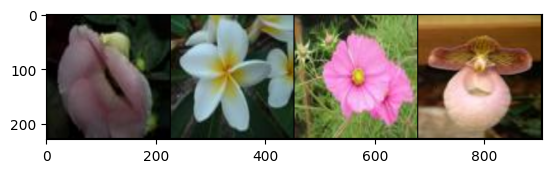

In [ ]:
dataloader = DataLoader(train_data, batch_size=4, shuffle=True)
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))
    plt.imshow(img)
    plt.show()

dataiter = iter(dataloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))



##### b.

In [ ]:

model = resnet50
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[15, 30, 45], gamma=0.1)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=True)

In [ ]:
best_accuracy = 0.0  # Initialize the best accuracy to zero

for epoch in range(60):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    scheduler.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    if accuracy > best_accuracy:
        best_accuracy = accuracy

    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Learning Rate: {scheduler.get_last_lr()[0]}, Accuracy: {accuracy}%')

print(f'Finished Training. Best Accuracy: {best_accuracy}%')


Epoch 1, Loss: 4.530651330947876, Learning Rate: 0.001, Accuracy: 3.235294117647059%
Epoch 2, Loss: 4.350068837404251, Learning Rate: 0.001, Accuracy: 12.843137254901961%
Epoch 3, Loss: 4.129187911748886, Learning Rate: 0.001, Accuracy: 20.784313725490197%
Epoch 4, Loss: 3.887275353074074, Learning Rate: 0.001, Accuracy: 29.215686274509803%
Epoch 5, Loss: 3.6282548904418945, Learning Rate: 0.001, Accuracy: 36.96078431372549%
Epoch 6, Loss: 3.3507306426763535, Learning Rate: 0.001, Accuracy: 42.64705882352941%
Epoch 7, Loss: 3.0850915610790253, Learning Rate: 0.001, Accuracy: 47.64705882352941%
Epoch 8, Loss: 2.8234082013368607, Learning Rate: 0.001, Accuracy: 52.64705882352941%
Epoch 9, Loss: 2.5674598813056946, Learning Rate: 0.001, Accuracy: 56.470588235294116%
Epoch 10, Loss: 2.3133370131254196, Learning Rate: 0.001, Accuracy: 60.68627450980392%
Epoch 11, Loss: 2.0776491537690163, Learning Rate: 0.001, Accuracy: 61.96078431372549%
Epoch 12, Loss: 1.8622958213090897, Learning Rate: 0

#### c.

In [ ]:


def train_and_evaluate(model, train_loader, val_loader, optimizer, scheduler, num_epochs=50):
    criterion = nn.CrossEntropyLoss()
    best_accuracy = 0

    for epoch in range(60):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        scheduler.step()

        # Validation phase
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        if accuracy > best_accuracy:
            best_accuracy = accuracy

        print(f'Epoch {epoch+1}/{num_epochs}, Learning Rate: {scheduler.get_last_lr()[0]}, Accuracy: {accuracy}%')

    return best_accuracy

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)


learning_rates = [0.01, 0.1]
accuracies = {}

for lr in learning_rates:
    model = models.resnet50(pretrained=True)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[15, 30, 45], gamma=0.1)

    print(f'Training with learning rate: {lr}')
    accuracy = train_and_evaluate(model, train_loader, val_loader, optimizer, scheduler)
    accuracies[lr] = accuracy
    print(f'Final accuracy with LR {lr}: {accuracy}%')


Training with learning rate: 0.01
Epoch 1/50, Learning Rate: 0.01, Accuracy: 11.666666666666666%
Epoch 2/50, Learning Rate: 0.01, Accuracy: 44.80392156862745%
Epoch 3/50, Learning Rate: 0.01, Accuracy: 65.58823529411765%
Epoch 4/50, Learning Rate: 0.01, Accuracy: 71.96078431372548%
Epoch 5/50, Learning Rate: 0.01, Accuracy: 73.43137254901961%
Epoch 6/50, Learning Rate: 0.01, Accuracy: 76.76470588235294%
Epoch 7/50, Learning Rate: 0.01, Accuracy: 77.54901960784314%
Epoch 8/50, Learning Rate: 0.01, Accuracy: 78.13725490196079%
Epoch 9/50, Learning Rate: 0.01, Accuracy: 77.94117647058823%
Epoch 10/50, Learning Rate: 0.01, Accuracy: 78.33333333333333%
Epoch 11/50, Learning Rate: 0.01, Accuracy: 78.52941176470588%
Epoch 12/50, Learning Rate: 0.01, Accuracy: 78.52941176470588%
Epoch 13/50, Learning Rate: 0.01, Accuracy: 78.82352941176471%
Epoch 14/50, Learning Rate: 0.01, Accuracy: 78.52941176470588%
Epoch 15/50, Learning Rate: 0.001, Accuracy: 78.62745098039215%
Epoch 16/50, Learning Rate: 

In [ ]:
for lr, acc in accuracies.items():
    print(f'Learning Rate: {lr}, Accuracy: {acc}%')

Learning Rate: 0.01, Accuracy: 79.11764705882354%
Learning Rate: 0.1, Accuracy: 38.92156862745098%


* Learning Rate: 0.01, Accuracy: 79.11764705882354%
* Learning Rate: 0.1, Accuracy: 38.92156862745098%
* Learning Rate: 0.001, Accuracy: 70.09803921568627%

The first one, learning rate = 0.01, accuracy is the highest on the target dataset.

### 2.2

###### a.

In [ ]:

def initialize_model(num_classes):
    model = models.resnet50(pretrained=True)
    # Freeze all layers first
    for param in model.parameters():
        param.requires_grad = False
    # Unfreeze the last fully connected layer
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    model.fc.requires_grad = True
    return model



In [ ]:

def train_model(model, train_loader, val_loader, optimizer, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    best_accuracy = 0

    for epoch in range(60):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Validation phase
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        if accuracy > best_accuracy:
            best_accuracy = accuracy
        print(f'Epoch {epoch+1}: Validation Accuracy = {accuracy}%')

    return best_accuracy




In [ ]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

learning_rates = [1, 0.1, 0.01, 0.001]
results = {}
for lr in learning_rates:
    model = initialize_model(num_classes)
    optimizer = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, momentum=0.9)
    print(f"Starting training with learning rate: {lr}")
    accuracy = train_model(model, train_loader, val_loader, optimizer)
    results[lr] = accuracy
    print(f"Final accuracy with LR {lr}: {accuracy}%")

print("\nFinal Accuracy Results:")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Starting training with learning rate: 1
Epoch 1: Validation Accuracy = 8.627450980392156%
Epoch 2: Validation Accuracy = 26.274509803921568%
Epoch 3: Validation Accuracy = 30.392156862745097%
Epoch 4: Validation Accuracy = 39.411764705882355%
Epoch 5: Validation Accuracy = 41.470588235294116%
Epoch 6: Validation Accuracy = 48.8235294117647%
Epoch 7: Validation Accuracy = 50.294117647058826%
Epoch 8: Validation Accuracy = 52.450980392156865%
Epoch 9: Validation Accuracy = 52.35294117647059%
Epoch 10: Validation Accuracy = 56.1764705882353%
Epoch 11: Validation Accuracy = 58.333333333333336%
Epoch 12: Validation Accuracy = 56.86274509803921%
Epoch 13: Validation Accuracy = 57.05882352941177%
Epoch 14: Validation Accuracy = 57.254901960784316%
Epoch 15: Validation Accuracy = 59.11764705882353%
Epoch 16: Validation Accuracy = 57.05882352941177%
Epoch 17: Validation Accuracy = 55.09803921568628%
Epoch 18: Validation Accuracy = 56.1764705882353%
Epoch 19: Validation Accuracy = 56.47058823529

In [ ]:

for lr, accuracy in results.items():
    print(f'Learning Rate: {lr}, Estimated Accuracy: {accuracy}')

Learning Rate: 1, Estimated Accuracy: 60.09803921568628
Learning Rate: 0.1, Estimated Accuracy: 70.49019607843137
Learning Rate: 0.01, Estimated Accuracy: 71.27450980392157
Learning Rate: 0.001, Estimated Accuracy: 67.84313725490196


The best learning rate is 0.01 in this case.

##### b.

Finetuning with multi-step learning rate decay:
* Learning Rate: 0.01, Accuracy: 79.11764705882354%
* Learning Rate: 0.1, Accuracy: 38.92156862745098%
* Learning Rate: 0.001, Accuracy: 70.09803921568627%

Feature extraction with only the final layer trained:
* Learning Rate: 1, Estimated Accuracy: 60.09803921568628
* Learning Rate: 0.1, Estimated Accuracy: 70.49019607843137
* Learning Rate: 0.01, Estimated Accuracy: 71.27450980392157
* Learning Rate: 0.001, Estimated Accuracy: 67.84313725490196



In these cases, the old one with learning rate 0.01, which is finetuning with multi-step learning rate decay. I think finetuning can allow for more comprehensive adaptation of the model to the target dataset by updating the weights of all layers with a controlled learning rate schedule. This flexibility enables the model to better capture relevant patterns specific to the target dataset, leading to a higher final accuracy. In contrast, the second approach, which freezes all but the last layer, limits the model's ability to adapt to the target dataset, resulting in slightly lower accuracy.

# Problem 3. Weakly and Semi-Supervised Learning for Image Classification

### 3.1
Difference between weakly supervised and semi-supervised pretraining is that for weakly supervised pertraining, it will use noisy or incomplete labels to train the model well. The model learns to associate broad patterns and context, often at a scale that allows it to overcome the noise in the labels. While for the semi-supervised pretraining, it will use a combination of a small amount of labeled data and a large amount of unlabeled data.  The idea is to use the labeled data to guide the learning process for the unlabeled data, often through techniques that infer labels for the unlabeled data.


The same 1 billion image dataset is used for both semi-supervised and weakly supervised pretraining.

In the semi-supervised approach, a smaller labeled dataset is used to train an initial model, known as the teacher model, which then predicts labels for the larger, unlabeled portion of the dataset. These predictions help to augment the labeled dataset, thus expanding the training data available for building a more robust model. This model, called the student model, is then fine-tuned using the original labeled data to correct any errors potentially introduced by the model’s predictions on the unlabeled data.

On the other hand, the weakly supervised approach uses existing annotations from the dataset (such as hashtags) directly as noisy labels to train the model. This approach acknowledges the imperfection and noise in the dataset’s labels but utilizes the scale of the dataset to allow the model to learn meaningful patterns despite these inaccuracies.



### 3.2

(a). Yes, training on large-scale hashtag data is unexpectedly robust to label noise. Training models on tens of billions of Instagram images using user-generated labels, and then testing these models on the ImageNet-1k and COCO datasets, the trained models achieved a top-1 accuracy of 85.4% on the ImageNet-1k dataset and an average precision (AP) of 45.2% on the COCO dataset. In contrast, models trained only on the ImageNet-1k dataset achieved a top-1 accuracy of 79.8% and an AP of 43.7% on ImageNet. These results demonstrate that even in the presence of noisy labels, the use of massive datasets and effective model architectures can enable models to learn sufficient robustness to ignore or overcome this noise.

Meanwhile, I found the graph that shows:

- For 1,000 classes:
  - No noise: 82.1%
  - 10% noise: 81.5%
  - 25% noise: 80.2%
  - 50% noise: 76.1%

- For 5,000 classes:
  - No noise: 52.6%
  - 10% noise: 51.7%
  - 25% noise: 50.3%
  - 50% noise: 46.1%

- For 9,000 classes:
  - No noise: 42.7%
  - 10% noise: 41.9%
  - 25% noise: 40.6%
  - 50% noise: 36.6%

  The accuracy of each model decreases by about 1% when 10% noise is introduced, another 1% with 25% noise, and around 4% with 50% noise. These results indicate that the models are indeed robust against label noise, even with high levels of noise.

(b). Resampling hashtag distribution during pretraining for transfer learning is essential to counteract the natural imbalance in large datasets.   This process ensures a more uniform class distribution, enhancing model generalization, reducing bias towards over-represented classes, and increasing robustness.   It prevents models from overfitting to frequent labels and improves their ability to learn from rare but informative tags, ensuring that all parts of the dataset contribute equally to the training process.  

### 3.3

(a). For teacher model, it is first trained on a smaller, labeled dataset and is then used to predict labels for a much larger, unlabeled dataset. The student model is first trained with this noisy supervi- sion, and fine-tuned with the original dataset which is to reduce the complexity at test time.The student model leverages the teacher’s output by training on the pseudo-labeled dataset, where the labels are the predictions made by the teacher on unlabeled data. During training, the student model tries to mimic the teacher’s predictions. This process not only helps the student model in capturing the nuanced understanding the teacher model has developed but also smooths the learning of difficult concepts that are not well represented in the small labeled dataset.Distillation is transferring knowledge from a complex model to a simpler model. Here is transferring from teacher to student. The student model, being less complex, is more efficient to deploy. The teacher’s knowledge is distilled into the student, allowing it to achieve comparable performance to the teacher but with less computational overhead.


(b). K is the number of top samples from unlabeled dataset to keep for each class in the new dataset. P is the number of top predicted classes considered for each image, enabling the model to account for multiple possible labels per image. Using P>1 ensures a more comprehensive training dataset. It helps in scenarios where an image might have characteristics of multiple classes. This consideration helps to avoid the pitfalls of overly narrow classification.


(c). First, teacher model will give possibility score to each class for every image. Each image For each image, the system retrieves the top P class predictions according to the confidence scores provided by the teacher model. The they will be ranked and in the ranked list, the top K images for each class will be selected to be in the new training dataset. This is how we form the new dataset with top K imagines acrossing all classes.  Yes, an image in this newly labeled dataset can belong to more than one class. This outcome is facilitated by the use of the parameter P>1 during the image evaluation phase. When the teacher model evaluates an image, it may identify multiple classes(P) that the image could be assoicated with.

(d). For accuracy increasing, I think as K increases, there is more image will be included in the new training set for each class, which will give more examples to train. This diversity exposes the student model to a broader array of features and scenarios within each class, improving its robustness and ability to recognize a wider range of images. Unfortunately beyond a certain point, increaseing K will cause decrease in accuracy since  lower-confidence images introduces noise and potential mislabels, diluting the quality of the training data. This leads to a decline in accuracy as the model begins to overfit to this noise.
